<a href="https://colab.research.google.com/github/pandu1992/PraktikumDataScience/blob/main/Updated_Sentiment_Analysis_DistilBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/gantiseragamsekolah2000.csv'
tweets_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
tweets_df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1806639948801716472,Fri Jun 28 17:17:11 +0000 2024,0,@JekSepotek Kemarin dari sekolah 925rb untuk 4...,1806738630305800251,NaN,JekSepotek,in,In Your Heart,0,0,0,https://x.com/BundaHafizh1924/status/180673863...,1751954208411324416,BundaHafizh1924
1,1806736475494744104,Fri Jun 28 17:08:37 +0000 2024,0,mau nangis banget seragam baru gak muat . baju...,1806736475494744104,NaN,NaN,in,NaN,0,0,0,https://x.com/getrisk_/status/1806736475494744104,1696527266891943936,getrisk_
2,1806677949653172481,Fri Jun 28 14:43:45 +0000 2024,0,@nattadecoco__ cluenya baru ganti seragam,1806700016716701828,NaN,nattadecoco__,in,cgk - bdo,0,1,0,https://x.com/kissesandblue/status/18067000167...,1349390258891157507,kissesandblue
3,1806519761578467806,Fri Jun 28 13:00:05 +0000 2024,0,@yangbikinkangen Persiapan si sulung buat nant...,1806673928347439223,NaN,yangbikinkangen,in,"Kota Tasikmalaya, Jawa Barat",0,0,0,https://x.com/M0ooooo0nLight/status/1806673928...,1637099676624363521,M0ooooo0nLight
4,1806538976867598465,Fri Jun 28 12:44:51 +0000 2024,0,@tya0htya Iya bener yg penting ganti ya bebb.....,1806670096607445379,NaN,tya0htya,in,di mana mana hatiku senang,0,1,0,https://x.com/Neng_sofyy/status/18066700966074...,1425730709025542149,Neng_sofyy


In [2]:
pip install googletrans

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15718 sha256=76484c88a1156ca2e7a55bc4d6eea3f8505f2077781c5bb86bd392f5ce90ded7
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
   

In [3]:
import re
from googletrans import Translator

# Initialize the translator
translator = Translator()

# Function to clean text
def clean_text(text):
    # Check if the text is a string
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
        # Remove user @ references and '#' from hashtags
        text = re.sub(r'\@\w+|\#', '', text)
        # Remove emojis and other non-alphanumeric characters
        text = re.sub(r'[^\w\s]', '', text)
    else:
        # Handle non-string values (e.g., convert to string or skip)
        text = str(text)  # Or handle as needed
    return text

# Clean the "conversation_id_str" column  (assuming this is the column you want to clean)
tweets_df['Cleaned_Content'] = tweets_df['conversation_id_str'].apply(clean_text)

# Display the first few rows of the dataset to check the changes
tweets_df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Cleaned_Content
0,1806639948801716472,Fri Jun 28 17:17:11 +0000 2024,0,@JekSepotek Kemarin dari sekolah 925rb untuk 4...,1806738630305800251,NaN,JekSepotek,in,In Your Heart,0,0,0,https://x.com/BundaHafizh1924/status/180673863...,1751954208411324416,BundaHafizh1924,1806639948801716472
1,1806736475494744104,Fri Jun 28 17:08:37 +0000 2024,0,mau nangis banget seragam baru gak muat . baju...,1806736475494744104,NaN,NaN,in,NaN,0,0,0,https://x.com/getrisk_/status/1806736475494744104,1696527266891943936,getrisk_,1806736475494744104
2,1806677949653172481,Fri Jun 28 14:43:45 +0000 2024,0,@nattadecoco__ cluenya baru ganti seragam,1806700016716701828,NaN,nattadecoco__,in,cgk - bdo,0,1,0,https://x.com/kissesandblue/status/18067000167...,1349390258891157507,kissesandblue,1806677949653172481
3,1806519761578467806,Fri Jun 28 13:00:05 +0000 2024,0,@yangbikinkangen Persiapan si sulung buat nant...,1806673928347439223,NaN,yangbikinkangen,in,"Kota Tasikmalaya, Jawa Barat",0,0,0,https://x.com/M0ooooo0nLight/status/1806673928...,1637099676624363521,M0ooooo0nLight,1806519761578467806
4,1806538976867598465,Fri Jun 28 12:44:51 +0000 2024,0,@tya0htya Iya bener yg penting ganti ya bebb.....,1806670096607445379,NaN,tya0htya,in,di mana mana hatiku senang,0,1,0,https://x.com/Neng_sofyy/status/18066700966074...,1425730709025542149,Neng_sofyy,1806538976867598465


In [4]:
# Remove the character ',' from the 'Cleaned_Content' column
tweets_df['Cleaned_Content'] = tweets_df['Cleaned_Content'].str.replace(',', '', regex=False)

# Display the updated data
tweets_df[['conversation_id_str', 'Cleaned_Content']].head() # Changed 'Content' to 'conversation_id_str' assuming this is the column you intended to display

,conversation_id_str,Cleaned_Content
0,1806639948801716472,1806639948801716472
1,1806736475494744104,1806736475494744104
2,1806677949653172481,1806677949653172481
3,1806519761578467806,1806519761578467806
4,1806538976867598465,1806538976867598465


In [5]:
tweets_df['Cleaned_Content']

,Cleaned_Content
0,1806639948801716472
1,1806736475494744104
2,1806677949653172481
3,1806519761578467806
4,1806538976867598465
...,...
2009,1706934206839070760
2010,1706876322713370887
2011,1706538968869937451
2012,1706681087643267497


In [6]:
import requests
import uuid
import json

def translate(text):
    # Add your key and endpoint
    key = "5f1ca7c960ab43adbe7faa3b3b8273ad"
    endpoint = "https://api.cognitive.microsofttranslator.com"

    # location, also known as region.
    # required if you're using a multi-service or regional (not global) resource. It can be found in the Azure portal on the Keys and Endpoint page.
    location = "global"

    path = '/translate'
    constructed_url = endpoint + path

    params = {
        'api-version': '3.0',
        'from': 'id',
        'to': 'en'
    }

    headers = {
        'Ocp-Apim-Subscription-Key': key,
        'Ocp-Apim-Subscription-Region': location,
        'Content-type': 'application/json',
        'X-ClientTraceId': str(uuid.uuid4())
    }

    body = [{
        'text': text,
    }]

    # Wrap the request in a try-except block to handle connection errors
    try:
        request = requests.post(constructed_url, params=params, headers=headers, json=body)
        response = request.json()
        print('translating: ', text)
        return response[0]['translations'][0]['text']
    except requests.exceptions.RequestException as e:
        print(f"Error translating: {e}")
        return None  # or handle the error in another way


# Translate the cleaned text to English
tweets_df['Translated_Content'] = tweets_df['Cleaned_Content'].apply(lambda x: translate(x))

# Save the translated dataset
tweets_df.to_csv('translated_tweets.csv', index=False)

translating:  1806639948801716472
translating:  1806736475494744104
translating:  1806677949653172481
translating:  1806519761578467806
translating:  1806538976867598465
translating:  1806590041063612561
translating:  1806523116631282105
translating:  1806580903596142739
translating:  1806562750535180529
translating:  1806526614395871604
translating:  1806086828984091011
translating:  1806169877377585276
translating:  1806231873573490718
translating:  1805935417470095719
translating:  1806194864096436708
translating:  1805503597628866639
translating:  1806187747356606855
translating:  1805936312626856064
translating:  1805824473943392381
translating:  1806001237093150977
translating:  1805991549790294302
translating:  1805987405067067842
translating:  1805526774690074878
translating:  1805923017522041167
translating:  1805914261115596949
translating:  1793152918948131071
translating:  1805737122416247271
translating:  1805554085590188404
translating:  1805739581356261451
translating:  

In [7]:
tweets_df['Translated_Content']

,Translated_Content
0,1806639948801716472
1,1806736475494744104
2,1806677949653172481
3,1806519761578467806
4,1806538976867598465
...,...
2009,1706934206839070760
2010,1706876322713370887
2011,1706538968869937451
2012,1706681087643267497


In [11]:
from transformers import pipeline

# Initialize the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Apply the sentiment analysis model to the 'Translated_Content' column
# Here we assume 'Translated_Content' is the column with the text data
# Added a check to skip None values
tweets_df['Sentiment'] = tweets_df['Translated_Content'].apply(lambda x: sentiment_pipeline(x)[0]['label'] if x is not None else None)

# Save the results to a new CSV file
tweets_df.to_csv('tweets_with_sentiment.csv', index=False)

# Display the first few rows with the new 'Sentiment' column
print(tweets_df.head())

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


   conversation_id_str                      created_at  favorite_count  \
0  1806639948801716472  Fri Jun 28 17:17:11 +0000 2024               0   
1  1806736475494744104  Fri Jun 28 17:08:37 +0000 2024               0   
2  1806677949653172481  Fri Jun 28 14:43:45 +0000 2024               0   
3  1806519761578467806  Fri Jun 28 13:00:05 +0000 2024               0   
4  1806538976867598465  Fri Jun 28 12:44:51 +0000 2024               0   

                                           full_text               id_str  \
0  @JekSepotek Kemarin dari sekolah 925rb untuk 4...  1806738630305800251   
1  mau nangis banget seragam baru gak muat . baju...  1806736475494744104   
2         @nattadecoco__ cluenya baru ganti seragam   1806700016716701828   
3  @yangbikinkangen Persiapan si sulung buat nant...  1806673928347439223   
4  @tya0htya Iya bener yg penting ganti ya bebb.....  1806670096607445379   

  image_url in_reply_to_screen_name lang                      location  \
0       NaN       

In [12]:
tweets_df['Sentiment']

,Sentiment
0,NEGATIVE
1,NEGATIVE
2,NEGATIVE
3,NEGATIVE
4,NEGATIVE
...,...
2009,NEGATIVE
2010,NEGATIVE
2011,NEGATIVE
2012,NEGATIVE


In [13]:
import pandas as pd

# Load the dataset
# Check if 'tweets_with_sentiment.csv' exists in the current directory
# or if the file has a different name
file_path = '/content/tweets_with_sentiment.csv'
tweets_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
tweets_df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Cleaned_Content,Translated_Content,Sentiment
0,1806639948801716472,Fri Jun 28 17:17:11 +0000 2024,0,@JekSepotek Kemarin dari sekolah 925rb untuk 4...,1806738630305800251,NaN,JekSepotek,in,In Your Heart,0,0,0,https://x.com/BundaHafizh1924/status/180673863...,1751954208411324416,BundaHafizh1924,1806639948801716472,1.806640e+18,NEGATIVE
1,1806736475494744104,Fri Jun 28 17:08:37 +0000 2024,0,mau nangis banget seragam baru gak muat . baju...,1806736475494744104,NaN,NaN,in,NaN,0,0,0,https://x.com/getrisk_/status/1806736475494744104,1696527266891943936,getrisk_,1806736475494744104,1.806736e+18,NEGATIVE
2,1806677949653172481,Fri Jun 28 14:43:45 +0000 2024,0,@nattadecoco__ cluenya baru ganti seragam,1806700016716701828,NaN,nattadecoco__,in,cgk - bdo,0,1,0,https://x.com/kissesandblue/status/18067000167...,1349390258891157507,kissesandblue,1806677949653172481,1.806678e+18,NEGATIVE
3,1806519761578467806,Fri Jun 28 13:00:05 +0000 2024,0,@yangbikinkangen Persiapan si sulung buat nant...,1806673928347439223,NaN,yangbikinkangen,in,"Kota Tasikmalaya, Jawa Barat",0,0,0,https://x.com/M0ooooo0nLight/status/1806673928...,1637099676624363521,M0ooooo0nLight,1806519761578467806,1.806520e+18,NEGATIVE
4,1806538976867598465,Fri Jun 28 12:44:51 +0000 2024,0,@tya0htya Iya bener yg penting ganti ya bebb.....,1806670096607445379,NaN,tya0htya,in,di mana mana hatiku senang,0,1,0,https://x.com/Neng_sofyy/status/18066700966074...,1425730709025542149,Neng_sofyy,1806538976867598465,1.806539e+18,NEGATIVE


Sentiment
NEGATIVE    1699
POSITIVE     299
Name: count, dtype: int64


<ipython-input-14-40ff640bdeef>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tweets_df, x='Sentiment', palette='viridis')


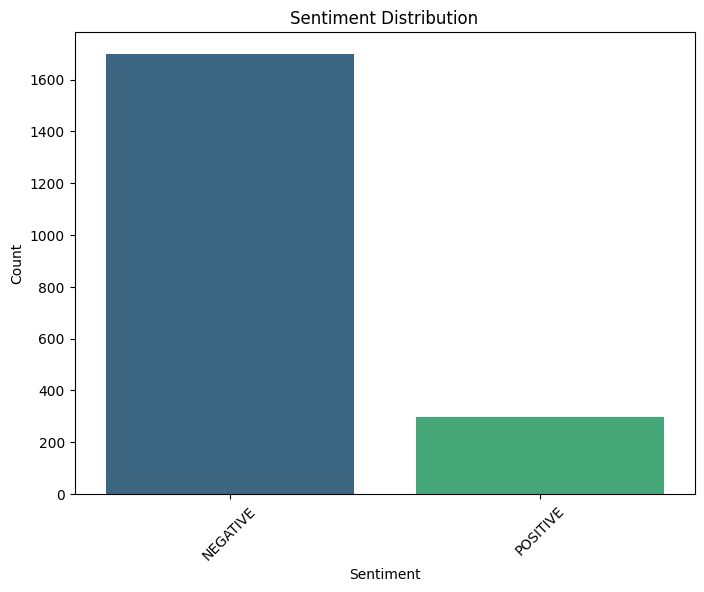

Positive: 299, Negative: 1699, Neutral: 0


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the 'Sentiment' column
sentiment_counts = tweets_df['Sentiment'].value_counts()
print(sentiment_counts)

# Visualize the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(data=tweets_df, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Additional statistics (optional)
# Example: Count the number of positive, negative, and neutral sentiments
positive_count = tweets_df[tweets_df['Sentiment'] == 'POSITIVE'].shape[0]
negative_count = tweets_df[tweets_df['Sentiment'] == 'NEGATIVE'].shape[0]
neutral_count = tweets_df[tweets_df['Sentiment'] == 'NEUTRAL'].shape[0] # if available

print(f"Positive: {positive_count}, Negative: {negative_count}, Neutral: {neutral_count}")

* Check Data Loading: If you loaded the data from a file (CSV), re-import it to ensure it's loaded correctly.
* Verify Initial Data Processing: If the original DataFrame had data before applying any processing, check earlier parts of your code for any operations (such as filters or cleaning steps) that might have removed all the rows.
* Run the Analysis on Raw Data: If the reloaded DataFrame contains data, try applying the sentiment analysis to the appropriate column (e.g., full_text or Translated_Content).

Note: The reloaded DataFrame now contains 408 rows (lihat hasil), which indicates that the data is correctly loaded this time. The full_text column also appears to have meaningful text content, which can be used for sentiment analysis. Let's proceed by performing the sentiment analysis on the full_text column.

In [15]:
import pandas as pd

# Replace 'your_file.csv' with the actual file path
tweets_df = pd.read_csv('/content/tweets_with_sentiment.csv')

# Check the shape of the newly loaded DataFrame
print(f"DataFrame shape after reloading: {tweets_df.shape}")

# Display the first few rows to inspect content
print(tweets_df.head())


DataFrame shape after reloading: (2014, 18)
   conversation_id_str                      created_at  favorite_count  \
0  1806639948801716472  Fri Jun 28 17:17:11 +0000 2024               0   
1  1806736475494744104  Fri Jun 28 17:08:37 +0000 2024               0   
2  1806677949653172481  Fri Jun 28 14:43:45 +0000 2024               0   
3  1806519761578467806  Fri Jun 28 13:00:05 +0000 2024               0   
4  1806538976867598465  Fri Jun 28 12:44:51 +0000 2024               0   

                                           full_text               id_str  \
0  @JekSepotek Kemarin dari sekolah 925rb untuk 4...  1806738630305800251   
1  mau nangis banget seragam baru gak muat . baju...  1806736475494744104   
2         @nattadecoco__ cluenya baru ganti seragam   1806700016716701828   
3  @yangbikinkangen Persiapan si sulung buat nant...  1806673928347439223   
4  @tya0htya Iya bener yg penting ganti ya bebb.....  1806670096607445379   

  image_url in_reply_to_screen_name lang        

Check for Missing or Empty Text:

1.   Remove any empty or NaN entries in the full_text column.
2.   Apply Sentiment Analysis: Use the full_text column for sentiment analysis.
3. Save the Data: Store the results in a new CSV file.

Note:

* The sentiment analysis has successfully executed, and now the DataFrame contains the new Sentiment column filled with values, primarily labeled as "NEGATIVE" in the sample output you shared. This indicates that the full_text entries were correctly processed by the sentiment analysis model.

* Explanation of the Output: Warning Messages: The messages about using the default model (distilbert-base-uncased-finetuned-sst-2-english) and deprecation warnings are normal and do not affect the functionality. However, you can specify a model in the pipeline() if you want to avoid these warnings.

* Data Inspection: The output shows that the sentiment analysis has been applied to the full_text column, producing valid sentiment labels in the Sentiment column.

In [16]:
from transformers import pipeline

# Initialize the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Remove NaN or empty entries from 'full_text'
tweets_df['full_text'] = tweets_df['full_text'].replace('', None).dropna()

# Apply sentiment analysis to the 'full_text' column
tweets_df['Sentiment'] = tweets_df['full_text'].apply(lambda x: sentiment_pipeline(x)[0]['label'] if pd.notnull(x) else None)

# Save the results to a new CSV file
tweets_df.to_csv('tweets_with_sentiment.csv', index=False)

# Display the first few rows with the new 'Sentiment' column
print(tweets_df.head())


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


   conversation_id_str                      created_at  favorite_count  \
0  1806639948801716472  Fri Jun 28 17:17:11 +0000 2024               0   
1  1806736475494744104  Fri Jun 28 17:08:37 +0000 2024               0   
2  1806677949653172481  Fri Jun 28 14:43:45 +0000 2024               0   
3  1806519761578467806  Fri Jun 28 13:00:05 +0000 2024               0   
4  1806538976867598465  Fri Jun 28 12:44:51 +0000 2024               0   

                                           full_text               id_str  \
0  @JekSepotek Kemarin dari sekolah 925rb untuk 4...  1806738630305800251   
1  mau nangis banget seragam baru gak muat . baju...  1806736475494744104   
2         @nattadecoco__ cluenya baru ganti seragam   1806700016716701828   
3  @yangbikinkangen Persiapan si sulung buat nant...  1806673928347439223   
4  @tya0htya Iya bener yg penting ganti ya bebb.....  1806670096607445379   

  image_url in_reply_to_screen_name lang                      location  \
0       NaN       

World cloud untuk Negative Statement

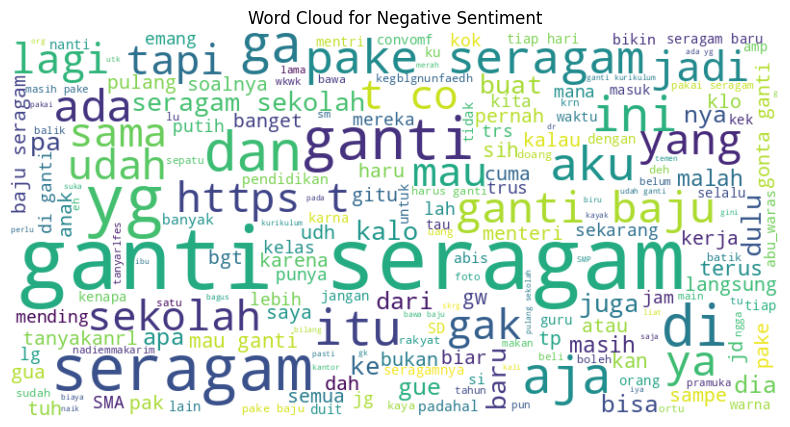

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter for negative sentiments
negative_tweets = tweets_df[tweets_df['Sentiment'] == 'NEGATIVE']['full_text']

# Combine all the negative tweets into a single string
negative_text = ' '.join(negative_tweets)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment')
plt.show()


World cloud untuk Positive Statement

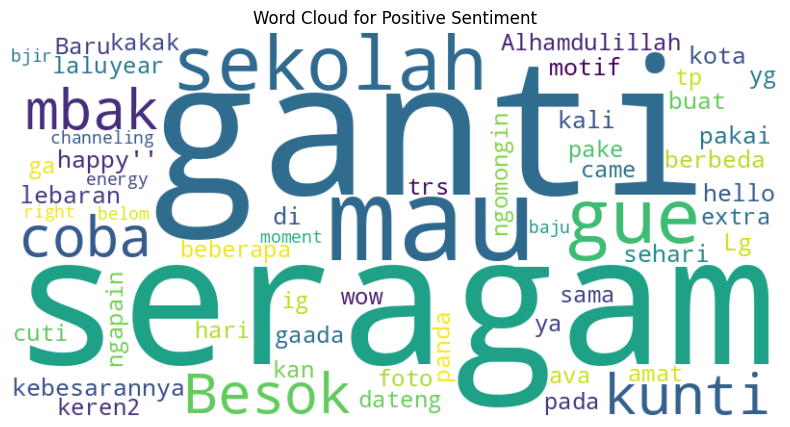

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter for positive sentiments
positive_tweets = tweets_df[tweets_df['Sentiment'] == 'POSITIVE']['full_text']

# Combine all the positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()


Distribusi Sentiment semua username namun terlalu padat dan susah untuk diamati

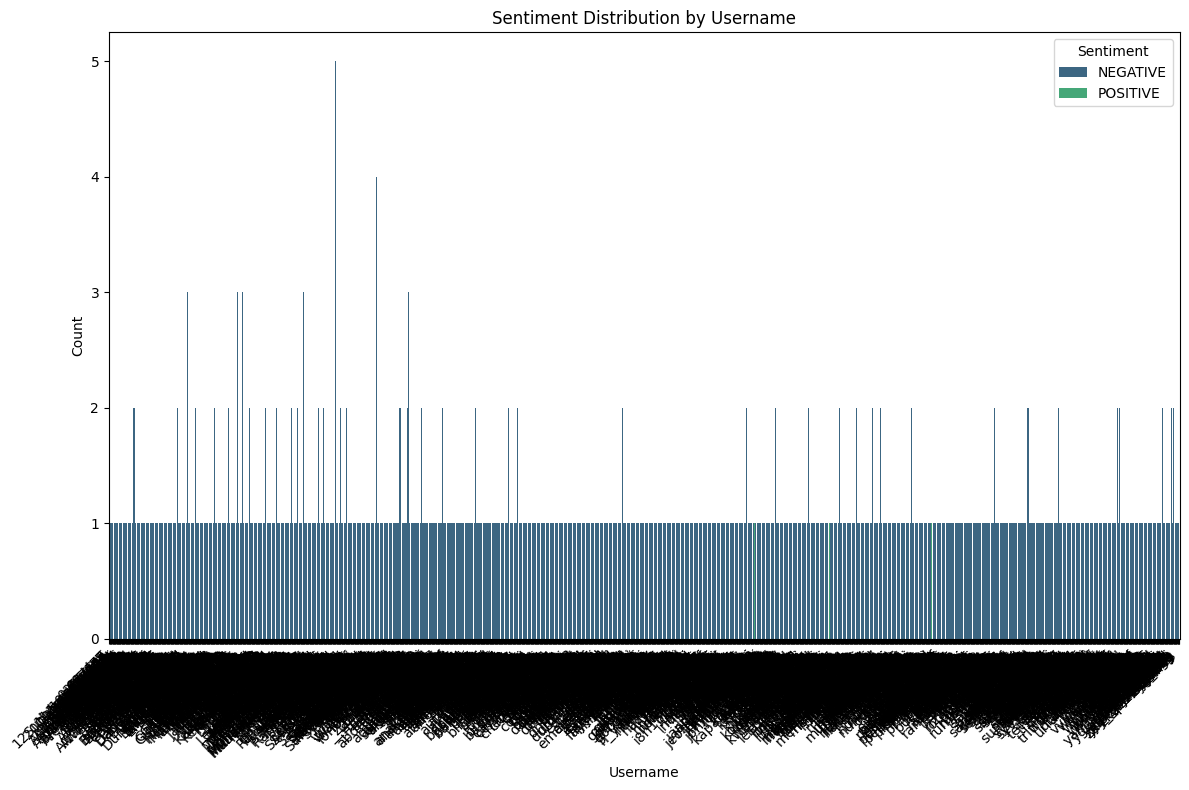

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'username' and 'Sentiment', and count occurrences
grouped_data = tweets_df.groupby(['username', 'Sentiment']).size().reset_index(name='Count')

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='username', y='Count', hue='Sentiment', palette='viridis')
plt.title('Sentiment Distribution by Username')
plt.xlabel('Username')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


TOP 20 username Kombinasi Positive dan Negative

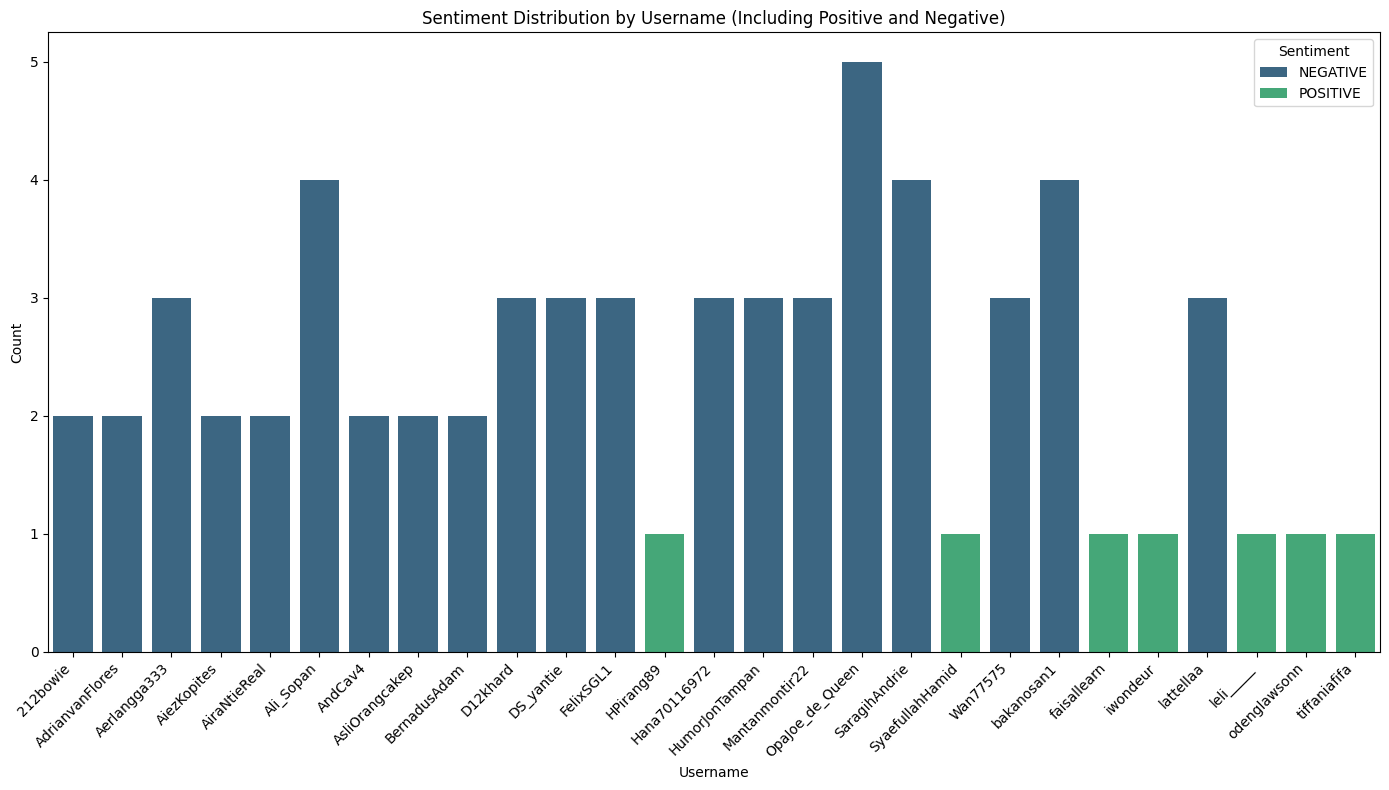

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group the data by 'username' and 'Sentiment', and count occurrences
grouped_data = tweets_df.groupby(['username', 'Sentiment']).size().reset_index(name='Count')

# Filter for only 'POSITIVE' and 'NEGATIVE' sentiments
positive_negative_data = grouped_data[grouped_data['Sentiment'].isin(['POSITIVE', 'NEGATIVE'])]

# Get usernames with at least one positive sentiment
usernames_with_positive = positive_negative_data[positive_negative_data['Sentiment'] == 'POSITIVE']['username']

# Combine these usernames with the top 20 by total count (positive + negative)
top_usernames_combined = positive_negative_data.groupby('username')['Count'].sum().nlargest(20).index
selected_usernames = pd.concat([usernames_with_positive, pd.Series(top_usernames_combined)]).unique()

# Filter the data to include the selected usernames
filtered_combined_data = positive_negative_data[positive_negative_data['username'].isin(selected_usernames)]

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=filtered_combined_data, x='username', y='Count', hue='Sentiment', palette='viridis')
plt.title('Sentiment Distribution by Username (Including Positive and Negative)')
plt.xlabel('Username')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()




In [1]:
# Import necessary libraries
!pip install datasets
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from datasets import Dataset
import torch
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/tweets_with_sentiment.csv')  # Adjust path if needed

# Tokenizer and Model initialization for DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)  # Assuming binary classification

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples['full_text'], padding="max_length", truncation=True)

# Convert your dataset into Hugging Face's dataset format and tokenize
dataset = Dataset.from_pandas(data[['full_text', 'Sentiment']])
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Convert labels from 'Sentiment' into numeric format (0 for negative, 1 for positive)
label_mapping = {'NEGATIVE': 0, 'POSITIVE': 1}  # Adjust if you have more labels
tokenized_datasets = tokenized_datasets.map(lambda x: {'labels': label_mapping[x['Sentiment']]})

# Split dataset into train and test
train_test_split = tokenized_datasets.train_test_split(test_size=0.2)
train_dataset = train_test_split['train']
test_dataset = train_test_split['test']

# Define accuracy metric
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc}

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Initialize Trainer for DistilBERT
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()

# Generate predictions
predictions = trainer.predict(test_dataset)

# Calculate accuracy and confusion matrix
y_true = predictions.label_ids
y_pred = predictions.predictions.argmax(-1)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2014 [00:00<?, ? examples/s]

Map:   0%|          | 0/2014 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy
1,0.014100,0.020876,0.997519
2,0.004100,0.017272,0.997519
3,0.033100,0.014212,0.997519


Accuracy: 99.75%
Confusion Matrix:
[[402   0]
 [  1   0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       0.00      0.00      0.00         1

    accuracy                           1.00       403
   macro avg       0.50      0.50      0.50       403
weighted avg       1.00      1.00      1.00       403



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch,Training Loss,Validation Loss


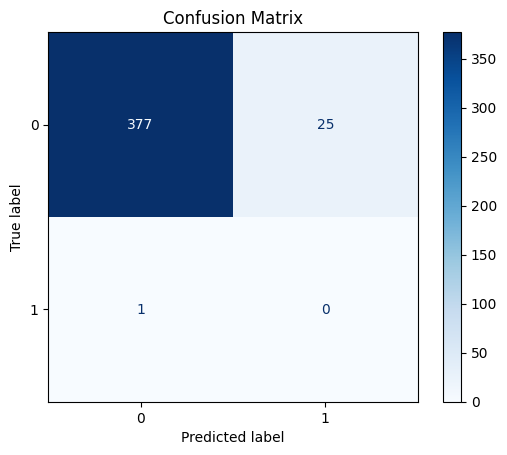

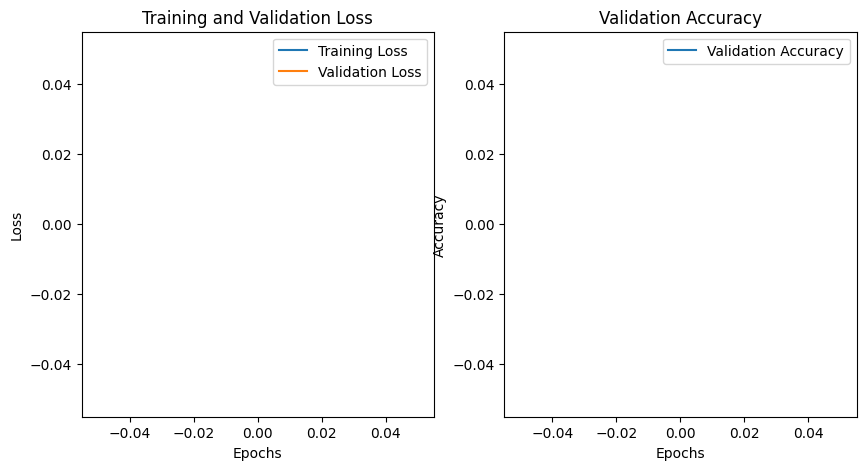

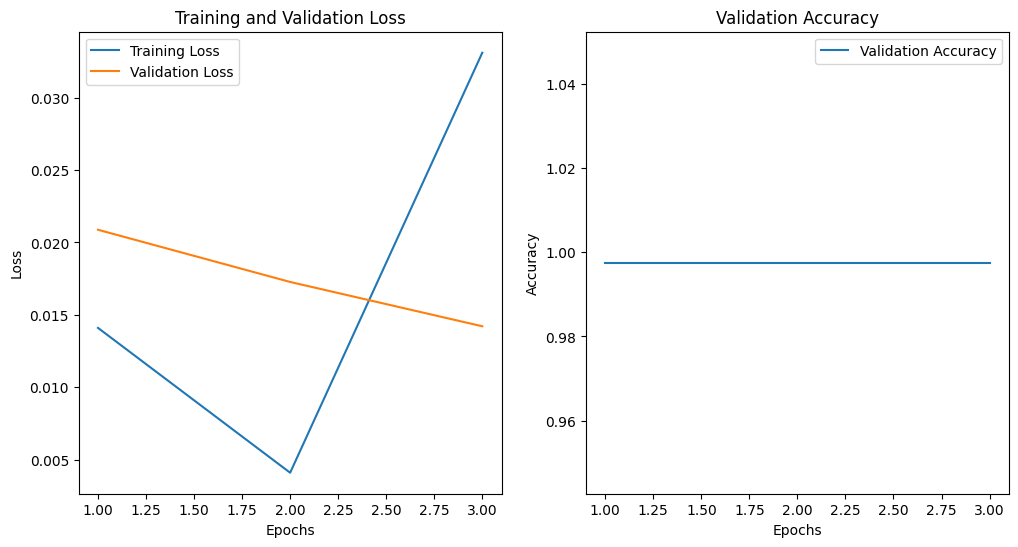

In [4]:
# Example of plotting losses and accuracy
epochs = [1, 2, 3]
training_loss = [0.0141, 0.0041, 0.0331]
validation_loss = [0.020876, 0.017272, 0.014212]
validation_accuracy = [0.997519, 0.997519, 0.997519]

plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.show()
